# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte} + H_2O_{Ni(s)} + 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a vacancy in the ceramic electrolyte crystal lattice, where the oxide formerly resided.  For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6e-08\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total concentration of crystal unit cells which can hold an oxide or a vacancy: $C_{\rm elyte}^\circ = 46.05
,\frac{\rm kmol}{\rm m^3}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\delta \phi=0$ to $\Delta \phi = -1$, should the current get more positive or more negative?

Assume the following conditions:

- $X_{\rm H_{Ni(s)}} = 0.6$
- $X_{\rm H_2O_{Ni(s)}} = 0.2$
- $X_{\rm O^{2-}_{elyte}} = 0.08$
- $T = 800^\circ$ C

Note that all crystal lattices in the electrolyte contain either one oxide or one vacancy.

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [11]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K
T = 1073

k_fwd_star = 4.16307062e+7 # Chemical forward rate constant, m^5/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_O2_elyte = 0.92

#C_o = ((C_elyte*X_O2_elyte)**-1.)*((C_elyte*(1.-X_O2_elyte))**1.)*((C_Ni_s*X_H_Ni)**-2.)*((C_Ni_s*X_H2O_Ni)**1.)
#C_o = ((C_elyte*X_O2_elyte)**-1.)*((C_Ni_s*X_H_Ni)**-2.)*((C_Ni_s*X_H2O_Ni)**1.)
#C_o = C_elyte*X_O2_elyte*C_elyte*(1.-X_O2_elyte)*C_Ni_s*X_H_Ni*C_Ni_s*X_H2O_Ni
#C_o = C_Ni_s**-1
C_o = 1.


C_react = (C_elyte*X_O2_elyte)*((C_Ni_s*X_H_Ni)**2.)
C_prod = (C_elyte*(1.-X_O2_elyte))*C_Ni_s*X_H2O_Ni*C_Ni_s*(1 - X_H_Ni - X_H2O_Ni)

print(C_react)
print(C_prod)

#JUST THE SURFACE??
#C_o = ((C_Ni_s*X_H_Ni)**-2.)*((C_Ni_s*X_H2O_Ni)**1.)
#C_react = (C_Ni_s*X_H_Ni)**2.
#C_prod = C_Ni_s*X_H2O_Ni

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.6, -0.54736842, -0.49473684, -0.44210526, -0.38947368,
                       -0.33684211, -0.28421053, -0.23157895, -0.17894737, -0.12631579, 
                       -0.07368421, -0.02105263, 0.03157895, 0.08421053, 0.13684211,
                       0.18947368, 0.24210526, 0.29473684, 0.34736842,  0.4])
i_validate = np.array([ 2.95485459e+02,  1.67237235e+02,  9.46362111e+01,  5.35248267e+01,
                       3.02235117e+01,  1.69788914e+01,  9.38389677e+00,  4.91133825e+00,
                       2.07299847e+0, -7.55633401e-02, -2.24926840e+0, -5.17140421e+0,
                       -9.81429418e+0, -1.77228325e+01, -3.15285384e+01, -5.58251789e+01,
                       -9.86973174e+01, -1.74410404e+02, -3.08157521e+02, -5.44442230e+02])

1.0310189760000001e-14
9.961535999999998e-17


### Add some calculations to the following code block:

In [20]:

# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,30)
i_elementary = np.zeros_like(delta_phi)
delta_Grxn = g_H2O_Ni_o + g_Vac_elyte_o - 2*g_H_Ni_o - g_Ox_elyte_o
k_rev_star = k_fwd_star/(C_o*exp(-delta_Grxn/R/T))
beta = 0.5
n = -2.
print(k_rev_star)

for ind, E in enumerate(delta_phi):
    
    k_fwd = k_fwd_star*exp(-beta*n*F*E/R/T)
    #k_rev = k_fwd/exp((-delta_Grxn - n*F*delta_phi[ind])/R/T)/C_o
    k_rev = k_rev_star*exp((1.-beta)*n*F*E/R/T)
    i_elementary[ind] = n*F*(k_fwd*C_react - k_rev*C_prod)
    
    
print(i_elementary[0])


406500.4571586435
131.83817397450866


Plot the results:

Text(0, 0.5, 'Current [A/m2]')

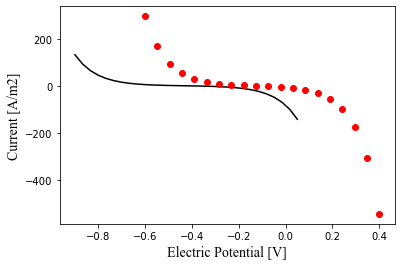

In [21]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m-tpb]')

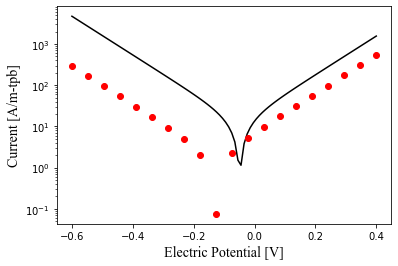

In [69]:
fig1, ax1 = plt.subplots()
ax1.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax1.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m-tpb]',family='Times New Roman',fontsize=14)

### Discussion:

Add some text to _THIS MARKDOWN BLOCK_ to discuss the plots above.  

Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validatiopn data?  If not, what might be missing from your code?

The discrepancy here is likely due to my improperly handling the activity concentrations for surface species.  The species in the electrolyte has activity concentrations in units of kmol/m^3, while the species on the Ni surface has activity concentrations in units of kmol/m^2.  But I also think I might be mishandling standard concentrations in the variable I've defined as C_o.  I'll look at your solution to see where I've gone wrong.

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [80]:
i_BV = np.zeros_like(delta_phi)
act_prod = (X_H_Ni**-2)*X_H2O_Ni*(X_O2_elyte**-1)*(1-X_O2_elyte)**1
i_o = n*F*(k_fwd_star**(1-beta))*(k_rev_star**beta)*(C_react**(1-beta))*(C_prod**beta)

for ind, E in enumerate(delta_phi):

    delta_phi_eq = -(delta_Grxn + R*T*log(act_prod))/n/F
    eta = delta_phi[ind] - delta_phi_eq
    i_BV[ind] = i_o*(exp(-beta*n*F*eta/R/T) - exp((1-beta)*n*F*eta/R/T))

#### Let's plot the BV and Marcus currents together:

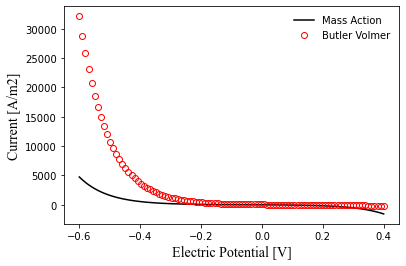

In [81]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results.

How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

Add your thoughts to _THIS MARKDOWN BLOCK_

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [ ]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    
    i_Tafel[ind] = 

In [ ]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Discussion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

In [ ]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.6))
plt.ylim((-100,20))
plt.show()

#### Space for additional discussion:
